In [1]:
import GPy
import matplotlib.pyplot as plt 
%matplotlib inline

As of Tue 7th of Nov running on devel branch of GPy 1.8.4

# Gaussian process regression tutorial

### Nicolas Durrande 2013
#### with edits by James Hensman, Neil D. Lawrence, Alan Saul

We will see in this tutorial the basics for building a 1 dimensional and a 2 dimensional Gaussian process regression model, also known as a kriging model.

We first import the libraries we will need:

In [2]:
import numpy as np

## 1-dimensional model

For this toy example, we assume we have the following inputs and outputs:

In [3]:
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05

Note that the observations Y include some Gaussianly distributed noise.

The first step is to define the covariance kernel we want to use for the model. We choose here a kernel based on Gaussian kernel (i.e. rbf, square exponential or exponentiated quadratic):

In [4]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

The parameter input_dim stands for the dimension of the input space. The parameters `variance` and `lengthscale` are optional, and default to 1. Many other kernels are implemented, type `GPy.kern.<tab>` to see a list

In [5]:
#type GPy.kern.<tab> here:
GPy.kern.BasisFuncKernel?

The inputs required for building the model are the observations (inputs X and outputs Y) and the kernel instance:

In [6]:
m = GPy.models.GPRegression(X,Y,kernel)

By default, some observation noise is added to the model. The functions `display` and `plot` give an insight of the model we have just built:

In [7]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


alternatively the model can be printed, giving a simpler display:

In [8]:
print(m)


Name : GP regression
Objective : 22.7256500688
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


 /Users/alansaul/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


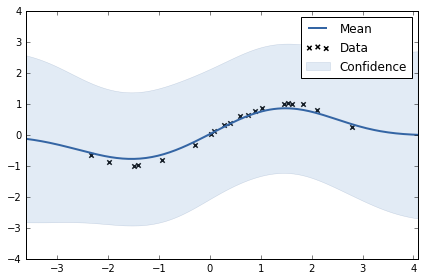

In [9]:
fig = m.plot()

The above cell shows our GP regression model before optimization of the parameters. The shaded region corresponds to ~95% confidence intervals (ie +/- 2 standard deviation).

The default values of the kernel parameters may not be optimal for the current data (for example, the confidence intervals seems too wide on the previous figure). A common approach is to find the values of the parameters that maximize the likelihood of the data. It as easy as calling `m.optimize` in GPy:

In [10]:
m.optimize(messages=True)

If we want to perform some restarts to try to improve the result of the optimization, we can use the `optimize_restarts` function. After the initial optimisation, this selects random (drawn from $N(0,1)$, if no priors or additional constraints are specified for the hyperparameters) initializations for the parameter values, optimizes each, and sets the model to the best solution found.


In [11]:
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = -22.6651789946
Optimization restart 2/10, f = -22.6651789736
Optimization restart 3/10, f = -22.6651789945
Optimization restart 4/10, f = -22.6651789946
Optimization restart 5/10, f = -22.6651789946
Optimization restart 6/10, f = -22.6651789946
Optimization restart 7/10, f = -22.6651789888
Optimization restart 8/10, f = -22.6651789946
Optimization restart 9/10, f = -22.6651789945
Optimization restart 10/10, f = -22.6651789945


In this simple example, the objective function (usually!) has only one local minima, and each of the found solutions are the same. 

Once again, we can use `print(m)` and `m.plot()` to look at the resulting model. This time, the paraemters values have been optimized to maximise the  log marginal likelihood: the resulting fit should be improved as demonstrated below.

GP_regression.,value,constraints,priors
rbf.variance,1.45802669215,+ve,
rbf.lengthscale,1.96321345509,+ve,
Gaussian_noise.variance,0.000960875136636,+ve,


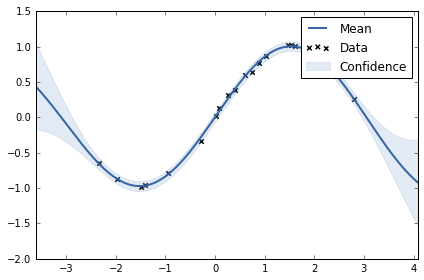

In [12]:
display(m)
fig = m.plot()

GP_regression.,value,constraints,priors
rbf.variance,1.45802669215,+ve,
rbf.lengthscale,1.96321345509,+ve,
Gaussian_noise.variance,0.000960875136636,+ve,


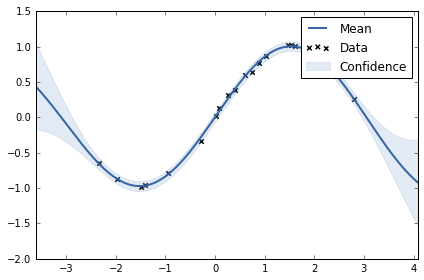

In [13]:
display(m)
fig = m.plot()

### Plotting density
Alternatively it is possible to plot the density of the GP with probability density indicated by opacity. In some instances (such as non-Gaussian likelihoods) this can give additional insights into the underlying generative model.

GP_regression.,value,constraints,priors
rbf.variance,1.45802669215,+ve,
rbf.lengthscale,1.96321345509,+ve,
Gaussian_noise.variance,0.000960875136636,+ve,


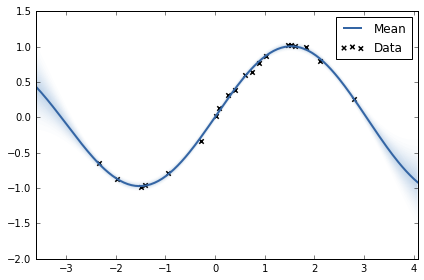

In [14]:
display(m)
fig = m.plot(plot_density=True)

## 2-dimensional example

Alternatively, rather than a one dimensional input, it is often the case that a regression problem is dependant on a large number of input dimensions.

Following is a 2 dimensional example:

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.376267923336,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,0.0004521833321,+ve,
Gaussian_noise.variance,0.0004521833321,+ve,


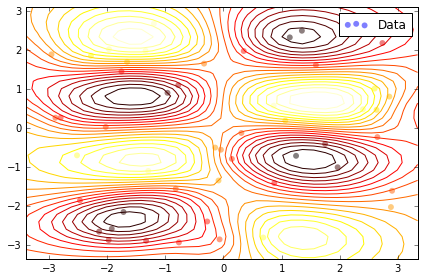

In [15]:
# sample inputs and outputs
X = np.random.uniform(-3.,3.,(50,2))
Y = np.sin(X[:,0:1]) * np.sin(2*X[:,1:2])+np.random.randn(50,1)*0.05

# define kernel
ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)
fig = m.plot()
display(m)

The flag `ARD=True` in the definition of the `Matern` kernel specifies that we want one lengthscale parameter per dimension (ie the GP is not isotropic). Note that for 2-d plotting, only the mean is shown and not the uncertainty around it. 

## Plotting slices
To see the uncertaintly associated with the above predictions, we can plot slices through the surface, i.e the conditional Gaussian process with a given input for one of the two dimensions. This is done by passing the optional `fixed_inputs` argument to the plot function. `fixed_inputs` is a list of tuples containing which of the inputs to fix, and to which value.

To get horixontal slices of the above GP, we'll fix second (index 1) input to -1, 0, and 1.5:

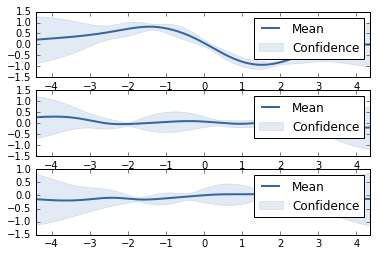

In [16]:
slices = [-1, 0, 1.5]

figure, axes = plt.subplots(3)

for i, y in enumerate(slices):
    m.plot(ax=axes[i], fixed_inputs=[(1,y)], row=(i+1), plot_data=False)

Note we've also passed the optional `ax` argument, to make the GP plot on a particular subplot

It's worth comparing the above slices to the 2d plot from earlier to see where they came from.

To get vertical slices, we simply fixed the other input. We'll turn the display of data off also:

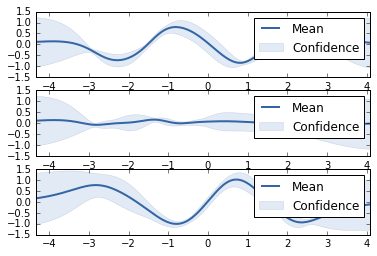

In [17]:
slices = [-1, 0, 1.5]

figure, axes = plt.subplots(3)

for i, y in enumerate(slices):
    m.plot(ax=axes[i], fixed_inputs=[(0,y)], row=(i+1), plot_data=False)

You can find a host of other plotting options in the `m.plot` docstring. `Type m.plot?<enter>` to see. 